<a href="https://colab.research.google.com/github/eunsour/Deep-Learning-from-Scratch/blob/main/Chapter%2004/Ch4_Neural_network_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**학습**이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다.
- 신경망이 학습할 수 있도록 해주는 **지표**인 손실 함수를 소개하고, 이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 목표이다.

# 4.1 데이터에서 학습한다!
- 신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다.
- 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이다. 

## 4.1.2 훈련 데이터와 시험 데이터
- 기계학습 문제는 데이터를 **훈련 데이터**와 **시험 데이터**로 나눠 학습과 실험을 수행하는 것이 일반적이다. 
- 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다.
- 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가한다.
- 한 데이터셋에만 지나치게 최적화된 상태를 **오버피팅**이라고 한다.

# 4.2 손실 함수
- 신경망 학습에서 사용하는 지표
- 임의의 함수를 사용할 수도 있지만 일반적으로는 평균 제곱 오차와 교차 엔트로피 오차를 사용한다.

## 4.2.1 평균 제곱 오차
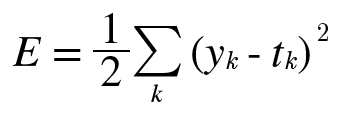
- 여기서 yk는 신경망의 출력, tk는 정답 레이블, k는 데이터의 차원 수를 나타낸다.

In [1]:
import numpy as np

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

위처럼 한 원소만 1로하고 그 외는 0으로 나타내는 표기법을 **원-핫 인코딩**이라고 한다.

In [3]:
# 각 원소의 출력과 정답 레이블의 차를 제곱한 후, 그 총합을 구한다.
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [4]:
# 정답은 "2"
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예 1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
# 예 2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작은 것을 알 수 있다. 즉 정답에 더 가까울 것으로 판단할 수 있다.

## 4.2.2 교차 엔트로피 오차
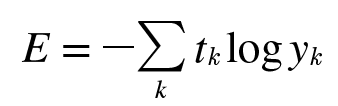
- log는 밑이 e인 자연로그이다. yk는 신경망의 출력, tk는 정답 레이블이다.
- tk는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다 (원-핫 인코딩)
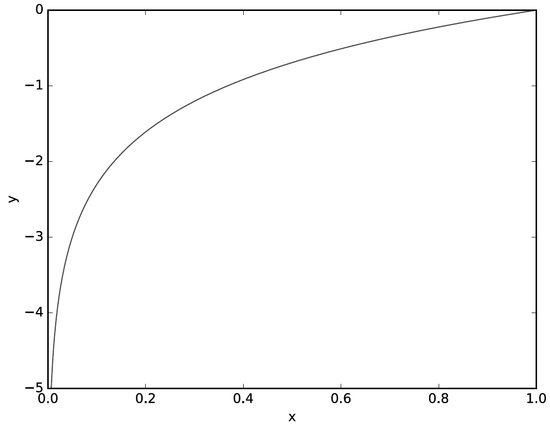
- x가 1일 때 y는 0이 되고 x가 0에 가까워질수록 y의 값은 점점 작아진다. 

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

delta를 더한 이유는 np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없게 된다. 따라서 0이 되지 않도록 한 것이다.

In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 4.2.3 미니배치 학습
- 기계학습 문제는 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다. 
- 많은 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 오래 걸린다.
- 이런 경우 데이터 일부를 추려 전체의 '근사치'로 이용한다. 이 일부를 **미니 배치**라고 한다. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label = False) # 정답 위치의 원소만 1이고 나머지가 0인 배열을 얻을 수 있다.

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000,)


In [12]:
# 훈련 데이터에서 무작위로 10장만 빼내오기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 0 이상 60000 미만의 수 중에서 무작위로 10개를 골라낸다.
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [15]:
np.random.choice(60000, 10)

array([31304, 11750, 26855, 48127, 29835, 58710, 41679, 17051, 14680,
       16481])

## 4.2.4 (배치용) 교차 엔트로피 오차 구현하기
- 데이터가 하나인 경우와 배치로 묶여 입력될 경우 모두 처리할 수 있도록 구현

In [16]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) # 데이터의 형상을 바꿔준다.
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7) / batch_size) 
    # 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.

- 정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7' 등의 숫자 레이블로 주어졌을 떄의 교차 엔트로피 오차는 다음과 같이 구현한다.

In [19]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) 
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

""" np.arange(batch_size)는 0부터 batch_size - 1 까지 배열을 생성한다.
    t에는 레이블이 [2, 7, 0, 9, 4]와 같이 저장되어 있으므로 y[np.arange(batch_size), t]는
    각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다."""

' np.arange(batch_size)는 0부터 batch_size - 1 까지 배열을 생성한다.\n    t에는 레이블이 [2, 7, 0, 9, 4]와 같이 저장되어 있으므로 y[np.arange(batch_size), t]는\n    각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다.'

## 4.2.5 왜 손실 함수를 설정하는가?
- '정확도'라는 지표를 놔두고 '손실 함수의 값'이라는 우회적인 방법을 택하는 이유는 무엇일까?
- 이 의문은 신경망 학습에서의 '미분'의 역할에 주목하면 해결된다. 
- 신경망 학습에서는 최적의 매개변수 (가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다. 이때 매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.
- **정확도를 지표로 삼아서는 안 되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다. **
- 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다. 이는 '계단 함수'를 활성화 함수로 사용하지 않는 이유와도 들어맞는다. 

# 4.3 수치 미분
- 경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다.

## 4.3.1 미분
- 미분은 '특정 순간'의 변화량을 뜻한다.
- 10분이라는 시간을 가능한 한 줄여(직전 1분에 달린 거리, 직전 1초에 달린 거리, 직전 0.1초에 달린 거리, ...식으로 간격을 줄여) 한 순간의 변화량(어느 순간의 속도)을 얻는 것이다.
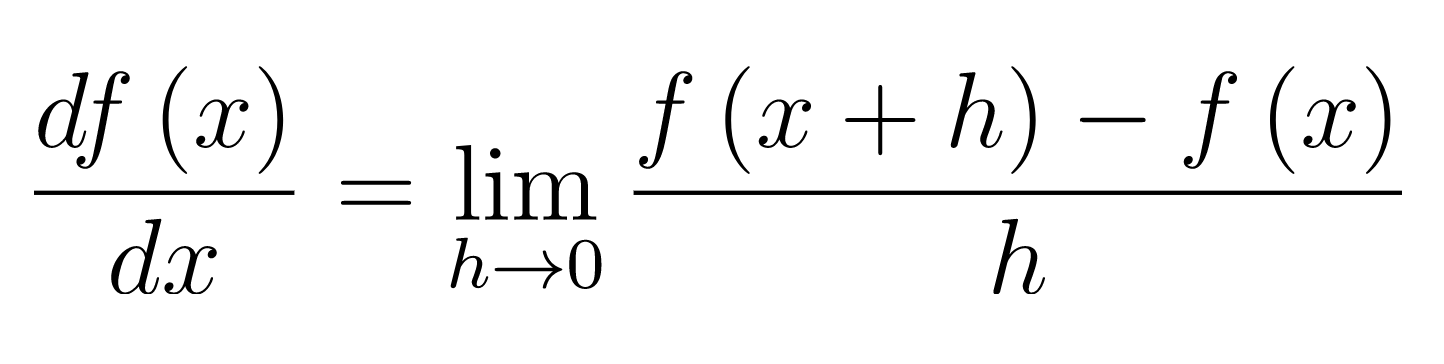


In [20]:
# 나쁜 구현 예
def numerical_diff(f, x): # 수치 미분
    h = 10e-50            # h에 가급적 작은 값을 대입 but, 반올림 오차 문제를 일으킨다.
    return (f(x+h) - f(x)) / h

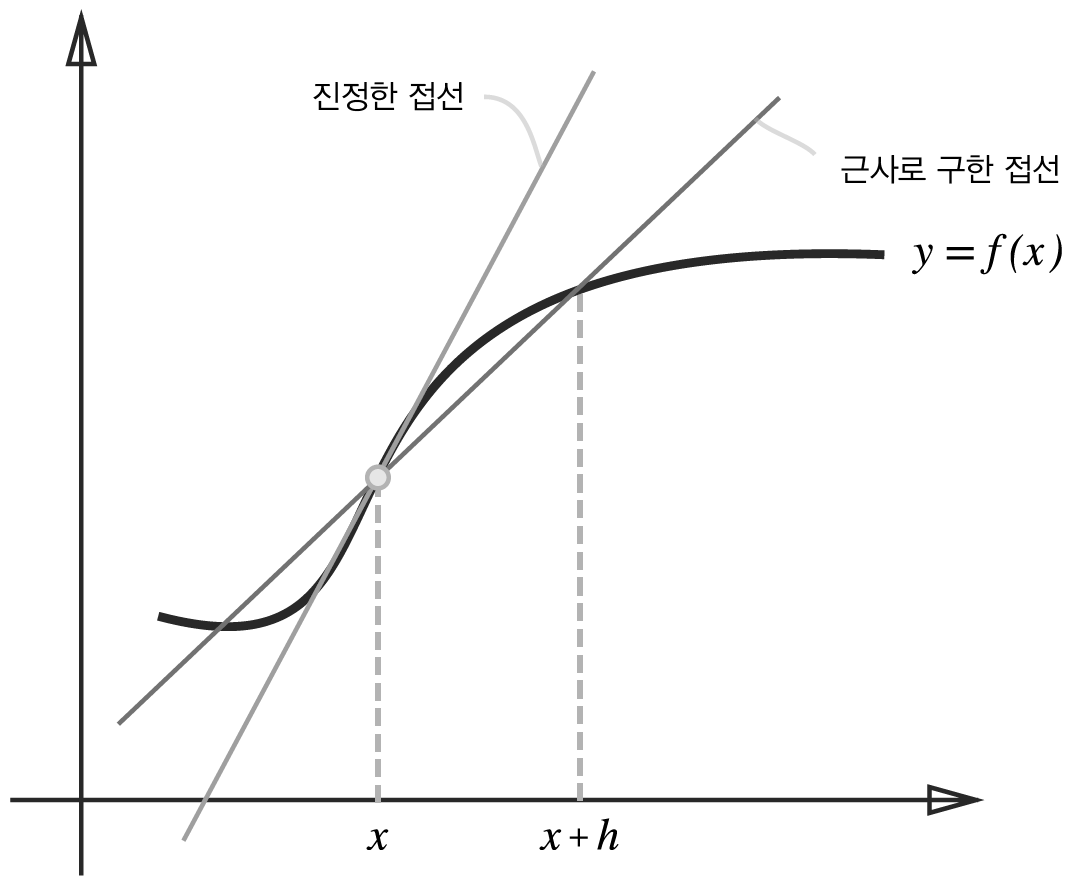
- 위 그림과 같이 수치 미분에는 오차가 포함된다.
- 이 오차를 줄이기 위해 (x + h)와 (x - h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 한다.
- 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 **중심 차분** 혹은 **중앙 차분**이라고 한다.

In [25]:
# 개선한 수치 미분
def numerical_diff(f, x):
    h = 1e-4    # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

- 위처럼 아주 작은 차분으로 미분하는 것을 **수치 미분**이라 한다. 

## 4.3.2 수치 미분의 예
y = 0.01x^2 + 0.1x

In [26]:
def function_1(x):
    return 0.01*x**2 + 0.1 * x

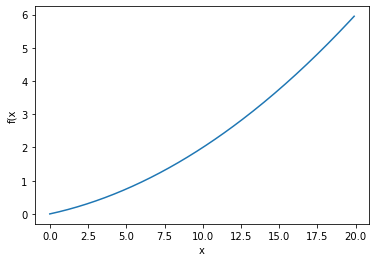

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel('f(x')
plt.plot(x, y)
plt.show()

x = 5일 떄와 10일 때 이 함수의 미분을 계산해보자.

In [28]:
numerical_diff(function_1, 5)

0.1999999999990898

In [29]:
numerical_diff(function_1, 10)

0.2999999999986347

이렇게 계산한 미분 값이 x에 대한 f(x)의 변화량이다. 즉, 함수의 기울기에 해당한다. 

## 4.3.3. 편미분
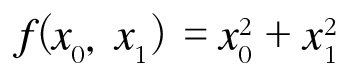

In [30]:
def function_2(x):
    return x[0]**2 + x[1] **2
    # 또는 return np.sum(x**2)

- 인수 x는 넘파이 배열이라고 가정할 때, 이 코드는 넘파이 배열의 각 원소를 제곱하고 그 합을 구할 뿐인 간단한 코드이다.
- 위 식을 미분할 때 주의할 점은 변수가 2개라는 것이다.
- 즉 x0와 x1 중 어느 변수에 대한 미분이냐를 구분해야 한다. 덧붙여 이와 같이 변수가 여럿인 함수에 대한 미분을 **편미분**이라고 한다.

In [31]:
# Q1. x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라.
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [32]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [33]:
# Q2. x0 = 3, x1 = 4일 때, x1에 대한 편미분을 구하라.
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1 

In [34]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

- 이처럼 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다. 
- 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다. 

# 4.4 기울기
- 앞 절의 예에서는 x0과 x1의 편미분을 변수별로 따로 계산하였다. 
- 그럼 x0와 x1의 편미분을 동시예 계산하고 싶다면 어떻게 할까?
- 모든 변수의 편미분을 벡터로 정리한 것을 **기울기**라고 한다.

In [35]:
def numerical_gradient(f, x):
    h = 1e-4    #0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

- 함수의 구현은 복잡하게 보이지만, 동작 방식은 변수가 하나일 때의 수치 미분과 거의 같다. 
- numerical_gradient(f, x) 함수의 인수인 f는 함수이고 x는 넘파이 배열이므로 넘파이 배열 x의 각 원소에 대해서 수치 미분을 구한다.

In [36]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [37]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [40]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

- 기울기는 각 지점에서 낮아지는 방향을 가리킨다.
- **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**이다.

## 4.4.1 경사법(경사 하강법)
- 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지 짐작할 수 없을 때, 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법이다.
- 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다.
- 그래서 최솟값이 되는 장소를 찾는 문제에서는 기울기 정보를 단서로 나아갈 방향을 정해야 한다. 
- **경사법**은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다.
- 이렇게 해서 함수의 값을 점차 줄이는 것이 **경사법**이다.

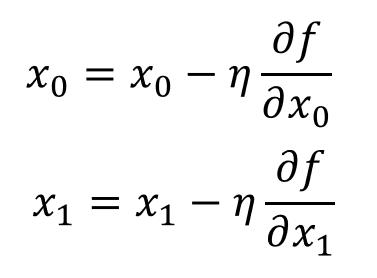

- eta(에타)는 갱신하는 양을 나타낸다. 이를 신경망 학습에서는 **학습률**이라고 한다. 
- 위 식은 1회에 해당하는 갱신이고, 이 단계를 반복한다. 갱신하는 단계를 여러 번 반복하면서 서서히 함수의 값을 줄인다. 
- 또한 학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야 한다. 이 값이 너무 크거나 작으면 '좋은 장소'를 찾아갈 수 없다.

In [41]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    """ 인수 f는 최적화하려는 함수,
        init_x는 초깃값,
        lr은 학습률, 
        step_num은 경사법에 따른 반복 횟수를 뜻한다"""
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [42]:
# Question : 경사법으로 f(x0, x1) = x[0]^2 + x[1]^2의 최솟값을 구하라.
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr = 0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

학습률이 너무 크거나 작으면 좋은 결과를 얻을 수 없다. 다음의 예를 살펴보자.

In [43]:
# 학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr = 10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [44]:
# 학습률이 너무 작은 예 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr = 1e-10, step_num=100)

array([-2.99999994,  3.99999992])

위 실험결과와 같이 학습률이 너무 크면 큰 값으로 발산해버린다. 반대로 너무 작으면 거의 갱신되지 않은 채 끝나버린다. 

- 학습률 같은 매개변수를 **하이퍼파라미터**라고 한다.
- 이는 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수이다. (사람이 직접 설정해야 하는 매개변수)
- 일반적으로 이 하이퍼파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다. 

## 4.4.2 신경망에서의 기울기
- 신경망 학습에서도 기울기를 구해야 한다.
- 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다. 

In [58]:
%cd ..

/content/drive/My Drive/Deep-Learning-from-Scratch


In [59]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [60]:
net = simpleNet()
print(net.W)    # 가중치 매개변수

[[ 0.18876772 -0.52562928  1.37338645]
 [-1.31431635 -0.8555848  -0.19896163]]


In [61]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.06962408 -1.08540389  0.6449664 ]


In [63]:
np.argmax(p)    # 최댓값의 인덱스 

2

In [64]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

0.3054650336013407

In [67]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.07958884  0.0783428  -0.15793164]
 [ 0.11938326  0.1175142  -0.23689746]]


In [69]:
# 람다식을 이용하면 더 편하게 구현할 수 있다.
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.07958884  0.0783428  -0.15793164]
 [ 0.11938326  0.1175142  -0.23689746]]


# 4.5 학습 알고리즘 구현하기
1. **전제**
    - 신경망에는 적응 가능한 가중치화 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.
2. **1단계 - 미니배치**
    - 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실함수 값을 줄이는 것이 목표이다.
3. **2단계 - 기울기 산출**
    - 미니배치의 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실함수의 값을 가장 작게 하는 방향을 제시한다.
4. **3단계 - 매개변수 갱신**
    - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
5. **4단계 - 반복**
    - 1 ~ 3단계를 반복한다.

이때 데이터를 미니배치로 무작위로 선정하기 때문에 **확률적 경사 하강법**이라고 부른다. 

## 4.5.1 2층 신경망 클래스 구현하기

In [7]:
%cd ../Deep-Learning-from-Scratch

/content/drive/My Drive/Deep-Learning-from-Scratch


In [8]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [10]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape

(10,)

- params 변수에는 이 신경망에 필요한 매개변수가 모두 저장된다.
- 그리고 params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용된다. 
- 예측 처리는 다음과 같이 실행할 수 있다.

In [11]:
x = np.random.rand(100, 784)    # 더미 입력 데이터
y = net.predict(x)

grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다.

In [ ]:
x = np.random.rand(100, 784)    # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)    # 더미 입력 데이터(100장 분량)

grads = net.numerical_gradient(x, t)    # 기울기 계산

grads['W1'].shape
grads['b1'].shape
grads['W2'].shape
grads['b2'].shape

## 4.5.2 미니배치 학습 구현하기
- 미니배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사법으로 매개변수를 갱신한다.

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

1. 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터를 추려낸다. (미니배치 크기 = 100)
2. 그리고 그 100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다.
3. 경사법에 의한 갱신 횟수(반복 횟수)를 10,000번으로 설정하고, 갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산하고, 그 값을 배열에 추가한다.

## 4.5.3 시험 데이터로 평가하기
- 훈련 데이터의 손실 함수 값이 작아지는 것은 신경망이 잘 학습하고 있다는 방증이지만, 이 결과만으로는 다른 데이터셋에서도 비슷한 실력을 발휘할지는 확실하지 않다.
- 훈련 데이터 외의 데이터를 올바르게 인식하는지, 다른 말로 '오버피팅'을 일으키지 않는지 확인해야 한다.
- 다음은 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록한다.

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

In [ ]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 4.6 정리
1. 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
2. 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
3. 신경망 학습은 손힐 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
4. 가중치 매개변수를 갱신할 떄는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
5. 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
6. 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
7. 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다.